# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
#Create dataframe from sample data
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


### 1. Is the distribution of body temperatures normal?

According to the histogram plot of the sample data, the distribution does look approximately normal, meaning that the values or observations are symmetric around the mean. The graphical representations of normal distributions are not skewed, resembling bell curves.

Another way to test the normality of a distribution is to use Scipy's normal test. We must assume that the null hypothesis is that the data is normally distributed, and that it is true. Using $\alpha$=0.05 as the significance level, we must reject the hypothesis if the p-value returned from the normaltest is less than 0.05. Because the p-value returned is 0.25, which is significantly larger than 0.05, we do not reject the hypothesis, indicating that the data is normally distributed.

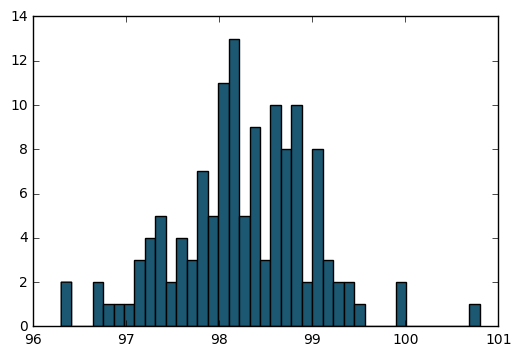

In [3]:
import matplotlib.pyplot as plt
temp=df['temperature']
plt.hist(temp, 40, facecolor='#1c5872')
plt.show()

In [4]:
import scipy.stats as stats
stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### 2. Is the sample size large? Are the observations independent? 

The Central Limit Theorem states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Another way of saying this is that the sampling distribution of the sampling means approaches a normal distribution as the sample size increases for a large number of independent, identically distributed variables.

In order for the CLT to hold, sample sizes must be sufficiently large, meaning greater or equal to 30 observations. In this dataset we have 130 observations, so the sample size is considered sufficiently large.

In order for observations to be independent, the occurrence of one observation cannot affect the probability of the occurrence of another observation. Because we are analyzing body temperatures and one's body temperature cannot affect another's, the observations in this dataset are independent.


### 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the *t or *z statistic?
* Now try using the other test. How is the result different? Why? 

For this question, I would use a one-sample test. One-sample tests are used to count the number of standard errors that separate a sample mean from the null hypothesis. In other words, one-sample tests are used to check whether the sample mean is greater than or less than the population mean. On the contrary, two-sample tests are used to understand the differences in population means. Because we are not interested in understanding the difference in two types of groups, like a treatment and control group, for example, we should use a one-sample test.

In this situation it is appropriate to use the z-statistic because our sample size is 130, which is larger than 30. The general rule is that the t-statistic is used when the sample size, n, is less than 30, and we use the z-statistic when n is greater than or equal to 30. For the t-statistic, we make the assumption that the original population is approximately normally distributed. For the z-statistic, the CLT holds, meaning that the mean of all samples is normally distributed, even if the original population is not.


#### Solving with a *z*-statistic

In [5]:
# Calculate the mean of the sample 
import numpy as np
sample_mean=np.mean(temp)
sample_mean

98.24923076923078

In [6]:
# Calculate the standard deviation of the sample 
sample_std=np.std(temp)
sample_std

0.7303577789050377

In [7]:
# Use the standard deviation of the sample to calculate the standard deviation of the sampling distribution
std_samp_dist=(sample_std/np.sqrt(130))
std_samp_dist

0.064056614695193359

In [12]:
# Use the multiplier number for 95% confidence interval, 1.96, to calculate the interval
margin_error=std_samp_dist*1.96

confidence_interval=(sample_mean-margin_error, sample_mean+margin_error)
confidence_interval


(98.123679804428193, 98.374781734033363)

I am confident that the there is a 95% chance that the true population mean of body temperatures is between 98.12$^{\circ}$F and 98.37$^{\circ}$F. This interval does not include 98.6$^{\circ}$F as Carl Wunderlich stated in 1868.

#### Solving with a *t*-statistic
Note: the d.f. should be 130-1=129, but because t-tables don't provide a value for a d.f. of 129, I will use 100 d.f. instead. The multiplier used in this case is 1.66.


In [14]:
# Use the t multiplier number for 95% confidence interval, 1.66, to calculate the interval.
margin_error_t=std_samp_dist*1.66
confidence_interval_t=(sample_mean-margin_error_t, sample_mean+margin_error_t)
confidence_interval_t

(98.142896788836751, 98.355564749624804)

The 95% confidence interval from the z-statistic is (98.123679804428193, 98.374781734033363), and (98.142896788836751, 98.355564749624804) from the t-statistic. The range derived from the t-statistic is slightly smaller.

### 4. At what temperature should we consider someone's temperature to be "abnormal"? 
The margin of error derived when using the z-statistic is rougly .13, and the associated 95% confidence interval is (98.123679804428193, 98.374781734033363). Therefore, once one's body temperature is below 98.12 and greater than 98.37, it should be considered abnormal.

In [15]:
margin_error

0.12555096480257899

### 5. Is there a significant difference between males and females in normal temperature? 
For this problem, I will use a hypothesis test for the difference of means and the z-statistic because the sample size for both men and women in the group is 65, which is larger than 30.

H<sub>0</sub>: $\mu$<sub>m</sub> = $\mu$<sub>w</sub>

H<sub>A</sub>: $\mu$<sub>m</sub> $\neq$ $\mu$<sub>w</sub>

$\alpha$ = 0.05

Reject H<sub>0</sub> if resulting p-value < 0.5

In [17]:
pd.value_counts(df['gender'])

M    65
F    65
Name: gender, dtype: int64

In [52]:
women=df[df['gender']=='F']
women

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [54]:
men=df[df['gender']=='M']
men

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0
17,98.2,M,64.0
19,99.4,M,70.0
21,98.2,M,71.0
22,98.6,M,70.0
23,98.4,M,68.0


In [74]:
# Calculate men's mean
men_mean=np.mean(men['temperature'])
men_mean

98.1046153846154

In [76]:
# Calculate men's std
men_std=np.std(men['temperature'])
men_std

0.6933598841828696

In [77]:
# Calculate women's mean
women_mean=np.mean(women['temperature'])
women_mean

98.39384615384613

In [78]:
# Calculate women's std
women_std=np.std(women['temperature'])
women_std

0.7377464486428966

In [88]:
# Calculate difference in sample means for men and women
mean_diff=women_mean-men_mean
mean_diff

0.289230769230727

In [86]:
# Calculate difference in std's of sampling means
w=(women_std**2)/65
m=(men_std**2)/65
diff_std=np.sqrt(w+m)
diff_std

0.12557668521231213

In [87]:
# Calculate critical z-value for 95% significance and two-tailed test, 1.96
diff_std*1.96

0.24613030301613179

In [90]:
mean_diff

0.289230769230727

The critical z-score is less than the difference in the means. Thus, the the probability of getting a difference of .289 is less than 5%, and we must reject the null hypothesis in favor of the alternative, meaning that there is a significant difference between the body temperatures of men and women. According to my analysis, and assuming that the sample is representative of the population at large, women have warmer body temperatures than men.